# "Nerez: Hladová zeď " - Song Refactoring

The goal is to express chords in a song in a factorized way (ie. without repeating) in a similar way how computer programs are structured.

The chords are according to the CD recording and relative to capo 3.

Chords: http://www.velkyzpevnik.cz/zpevnik/nerez/hladova-zed

There's another similar (shorter) version on YouTube: https://www.youtube.com/watch?v=P1gGTMYBvgk

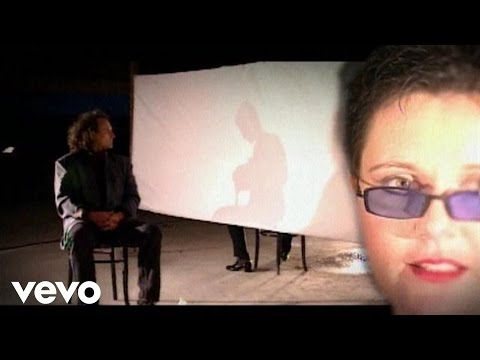

In [104]:
from IPython.display import YouTubeVideo
YouTubeVideo("P1gGTMYBvgk")

## First define the fully expanded song as a list of beats

In [93]:
full_song = """
# capo 3

# intro 1
Am7,Hm7|Em,Hm7
Am7,Hm7|Em,Hm7
Am7,Hm7|Em,Hm7
Am7,Hm7|H7

# intro 2
Am7,Hm7|Em,Hm7
Am7,Hm7|Em,Hm7
Am7,Hm7|Em,Hm7
Am7,Hm7|H7

# verse 1
Am7,Hm7|Em,Hm7
Am7,Hm7|Em,Hm7
Am7,Hm7|Em,Hm7
Am7,Hm7|H7

# verse 2
Am7,Hm7|Em,Hm7
Am7,Hm7|Em,Hm7
Am7,Hm7|Em,Hm7
Am7,Hm7|H7

# chorus
Am6|Am6|Em9|Em9
Am6|Am6|H7/4|H7
Em|Hm7|Am7|Am7
H4/C|Hm7,Am7|Em|Em

# verse 3
Am7,Hm7|Em,Hm7
Am7,Hm7|Em,Hm7
Am7,Hm7|Em,Hm7
Am7,Hm7|H7

# chorus
Am6|Am6|Em9|Em9
Am6|Am6,F#7|H7/4|H7
Em|Hm7|Am7|Am7
H4/C|Hm7,Am7|Em|Em

# verse 4
Am7,Hm7|Em,Hm7
Am7,Hm7|Em,Hm7
Am7,Hm7|Em,Hm7
Am7,Hm7|Em,Hm7

# solo 1
Am7,Hm7|Em,Hm7
Am7,Hm7|Em,Hm7
Am7,Hm7|Em,Hm7
Am7,Hm7|H7

# chorus
Am6|Am6|Em9|Em9
Am6|Am6,F#7|H7/4|H7
Em|Hm7|Am7|Am7
H4/C|Hm7,Am7|Em|Em

# outro
Am7,Hm7|Em,Hm7
Am7,Hm7|Em,Hm7

Am7,Hm7|Em,Hm7
Am7,Hm7|Em,Hm7
Am7,Hm7|Em,Hm7
Am7,Hm7|Em,Hm7

Am7,Hm7|Em,Hm7
Am7,Hm7|Em,Hm7
Am7,Hm7|Em,Hm7
Am7,Hm7|Em,Hm7

Am7,Hm7|Em,Hm7
Am7,Hm7|Em,Hm7
Am7,Hm7|Em,Hm7
Am7,Hm7|Em,Hm7

# solo 2
Am7,Hm7|Em,Hm7
Am7,Hm7|Em,Hm7
Am7,Hm7|Em,Hm7
Am7,Hm7|H7

# ending
Em|Em|Em|Em
"""

In [94]:
all_rows = [line for line in full_song.strip().split('\n') if len(line) > 0 and line[0] != '#']
all_rows

['Am7,Hm7|Em,Hm7',
 'Am7,Hm7|Em,Hm7',
 'Am7,Hm7|Em,Hm7',
 'Am7,Hm7|H7',
 'Am7,Hm7|Em,Hm7',
 'Am7,Hm7|Em,Hm7',
 'Am7,Hm7|Em,Hm7',
 'Am7,Hm7|H7',
 'Am7,Hm7|Em,Hm7',
 'Am7,Hm7|Em,Hm7',
 'Am7,Hm7|Em,Hm7',
 'Am7,Hm7|H7',
 'Am7,Hm7|Em,Hm7',
 'Am7,Hm7|Em,Hm7',
 'Am7,Hm7|Em,Hm7',
 'Am7,Hm7|H7',
 'Am6|Am6|Em9|Em9',
 'Am6|Am6|H7/4|H7',
 'Em|Hm7|Am7|Am7',
 'H4/C|Hm7,Am7|Em|Em',
 'Am7,Hm7|Em,Hm7',
 'Am7,Hm7|Em,Hm7',
 'Am7,Hm7|Em,Hm7',
 'Am7,Hm7|H7',
 'Am6|Am6|Em9|Em9',
 'Am6|Am6,F#7|H7/4|H7',
 'Em|Hm7|Am7|Am7',
 'H4/C|Hm7,Am7|Em|Em',
 'Am7,Hm7|Em,Hm7',
 'Am7,Hm7|Em,Hm7',
 'Am7,Hm7|Em,Hm7',
 'Am7,Hm7|Em,Hm7',
 'Am7,Hm7|Em,Hm7',
 'Am7,Hm7|Em,Hm7',
 'Am7,Hm7|Em,Hm7',
 'Am7,Hm7|H7',
 'Am6|Am6|Em9|Em9',
 'Am6|Am6,F#7|H7/4|H7',
 'Em|Hm7|Am7|Am7',
 'H4/C|Hm7,Am7|Em|Em',
 'Am7,Hm7|Em,Hm7',
 'Am7,Hm7|Em,Hm7',
 'Am7,Hm7|Em,Hm7',
 'Am7,Hm7|Em,Hm7',
 'Am7,Hm7|Em,Hm7',
 'Am7,Hm7|Em,Hm7',
 'Am7,Hm7|Em,Hm7',
 'Am7,Hm7|Em,Hm7',
 'Am7,Hm7|Em,Hm7',
 'Am7,Hm7|Em,Hm7',
 'Am7,Hm7|Em,Hm7',
 'Am7,Hm7|Em,Hm7',
 'Am7,Hm7|

In [95]:
def beats(row):
    """Splits the chords into separate beats by the pipe symbol."""
    return row.split('|')

# http://stackoverflow.com/questions/12472338/flattening-a-list-recursively
def flatten(S):
    if S == []:
        return S
    if isinstance(S[0], list):
        return flatten(S[0]) + flatten(S[1:])
    return S[:1] + flatten(S[1:])

In [96]:
all_beats = flatten([beats(row) for row in all_rows])
all_beats

['Am7,Hm7',
 'Em,Hm7',
 'Am7,Hm7',
 'Em,Hm7',
 'Am7,Hm7',
 'Em,Hm7',
 'Am7,Hm7',
 'H7',
 'Am7,Hm7',
 'Em,Hm7',
 'Am7,Hm7',
 'Em,Hm7',
 'Am7,Hm7',
 'Em,Hm7',
 'Am7,Hm7',
 'H7',
 'Am7,Hm7',
 'Em,Hm7',
 'Am7,Hm7',
 'Em,Hm7',
 'Am7,Hm7',
 'Em,Hm7',
 'Am7,Hm7',
 'H7',
 'Am7,Hm7',
 'Em,Hm7',
 'Am7,Hm7',
 'Em,Hm7',
 'Am7,Hm7',
 'Em,Hm7',
 'Am7,Hm7',
 'H7',
 'Am6',
 'Am6',
 'Em9',
 'Em9',
 'Am6',
 'Am6',
 'H7/4',
 'H7',
 'Em',
 'Hm7',
 'Am7',
 'Am7',
 'H4/C',
 'Hm7,Am7',
 'Em',
 'Em',
 'Am7,Hm7',
 'Em,Hm7',
 'Am7,Hm7',
 'Em,Hm7',
 'Am7,Hm7',
 'Em,Hm7',
 'Am7,Hm7',
 'H7',
 'Am6',
 'Am6',
 'Em9',
 'Em9',
 'Am6',
 'Am6,F#7',
 'H7/4',
 'H7',
 'Em',
 'Hm7',
 'Am7',
 'Am7',
 'H4/C',
 'Hm7,Am7',
 'Em',
 'Em',
 'Am7,Hm7',
 'Em,Hm7',
 'Am7,Hm7',
 'Em,Hm7',
 'Am7,Hm7',
 'Em,Hm7',
 'Am7,Hm7',
 'Em,Hm7',
 'Am7,Hm7',
 'Em,Hm7',
 'Am7,Hm7',
 'Em,Hm7',
 'Am7,Hm7',
 'Em,Hm7',
 'Am7,Hm7',
 'H7',
 'Am6',
 'Am6',
 'Em9',
 'Em9',
 'Am6',
 'Am6,F#7',
 'H7/4',
 'H7',
 'Em',
 'Hm7',
 'Am7',
 'Am7',
 'H4/C',
 'Hm7,Am

In [97]:
len(all_beats)

144

## Then define the song in the factorized form

In [98]:
am7_hm7 = 'Am7,Hm7'
verse_line_A = [am7_hm7, 'Em,Hm7']
verse_line_B = [am7_hm7, 'H7']

verse_A = 3 * [verse_line_A] + verse_line_B
verse_B = 4 * [verse_line_A]

intro = verse_A
solo = verse_A

am6_2x = 2 * ['Am6']

chorus_line_1 = am6_2x
chorus_line_2 = 2 * ['Em9']
chorus_line_3_A = am6_2x
chorus_line_3_B = ['Am6', 'Am6,F#7']
chorus_line_4 = ['H7/4', 'H7']
chorus_line_5 = ['Em', 'Hm7']
chorus_line_6 = 2 * ['Am7']
chorus_line_7 = ['H4/C', 'Hm7,Am7']
chorus_line_8 = 2 * ['Em']

chorus_part_2 = [
    chorus_line_5,
    chorus_line_6,
    chorus_line_7,
    chorus_line_8
]

chorus_A = [
  chorus_line_1,
  chorus_line_2,
  chorus_line_3_A,
  chorus_line_4
] + chorus_part_2

chorus_B = [
  chorus_line_1,
  chorus_line_2,
  chorus_line_3_B,
  chorus_line_4
] + chorus_part_2

# or more precisely: 2 * [verse_line_A] + 3 * [4 * [verse_line_A]]
verse_C = 14 * [verse_line_A]

ending = 4 * ['Em']

song = [
    intro,
    intro,
    verse_A,
    verse_A,
    chorus_A,
    verse_A,
    chorus_B,
    verse_B,
    solo,
    chorus_B,
    verse_C,
    solo,
    ending
]

song

[[['Am7,Hm7', 'Em,Hm7'],
  ['Am7,Hm7', 'Em,Hm7'],
  ['Am7,Hm7', 'Em,Hm7'],
  'Am7,Hm7',
  'H7'],
 [['Am7,Hm7', 'Em,Hm7'],
  ['Am7,Hm7', 'Em,Hm7'],
  ['Am7,Hm7', 'Em,Hm7'],
  'Am7,Hm7',
  'H7'],
 [['Am7,Hm7', 'Em,Hm7'],
  ['Am7,Hm7', 'Em,Hm7'],
  ['Am7,Hm7', 'Em,Hm7'],
  'Am7,Hm7',
  'H7'],
 [['Am7,Hm7', 'Em,Hm7'],
  ['Am7,Hm7', 'Em,Hm7'],
  ['Am7,Hm7', 'Em,Hm7'],
  'Am7,Hm7',
  'H7'],
 [['Am6', 'Am6'],
  ['Em9', 'Em9'],
  ['Am6', 'Am6'],
  ['H7/4', 'H7'],
  ['Em', 'Hm7'],
  ['Am7', 'Am7'],
  ['H4/C', 'Hm7,Am7'],
  ['Em', 'Em']],
 [['Am7,Hm7', 'Em,Hm7'],
  ['Am7,Hm7', 'Em,Hm7'],
  ['Am7,Hm7', 'Em,Hm7'],
  'Am7,Hm7',
  'H7'],
 [['Am6', 'Am6'],
  ['Em9', 'Em9'],
  ['Am6', 'Am6,F#7'],
  ['H7/4', 'H7'],
  ['Em', 'Hm7'],
  ['Am7', 'Am7'],
  ['H4/C', 'Hm7,Am7'],
  ['Em', 'Em']],
 [['Am7,Hm7', 'Em,Hm7'],
  ['Am7,Hm7', 'Em,Hm7'],
  ['Am7,Hm7', 'Em,Hm7'],
  ['Am7,Hm7', 'Em,Hm7']],
 [['Am7,Hm7', 'Em,Hm7'],
  ['Am7,Hm7', 'Em,Hm7'],
  ['Am7,Hm7', 'Em,Hm7'],
  'Am7,Hm7',
  'H7'],
 [['Am6', 'Am6'],
 

In [99]:
all_beats_factorized = flatten(song)

In [100]:
assert all_beats_factorized == all_beats

They match!

### Discussion

This way we can define the hierarchical structure of song harmony in the Python language as a tree of expressions and let it unfold the tree into a list of beats.

The drawback is that we lose the information about the expression tree. So we might define a symbolic tree which can be evaluated separately. Then we can visualize the structure of the tree itself.

In [101]:
with open('hladova-zed-beats.txt', 'w') as f:
    f.write('\n'.join(all_beats))

In [102]:
def split_to_half_beat(beat):
    halves = beat.split(',')
    if len(halves) == 1:
        halves = 2 * halves
    return halves
all_half_beats = flatten([split_to_half_beat(beat) for beat in all_beats_factorized])
all_half_beats

['Am7',
 'Hm7',
 'Em',
 'Hm7',
 'Am7',
 'Hm7',
 'Em',
 'Hm7',
 'Am7',
 'Hm7',
 'Em',
 'Hm7',
 'Am7',
 'Hm7',
 'H7',
 'H7',
 'Am7',
 'Hm7',
 'Em',
 'Hm7',
 'Am7',
 'Hm7',
 'Em',
 'Hm7',
 'Am7',
 'Hm7',
 'Em',
 'Hm7',
 'Am7',
 'Hm7',
 'H7',
 'H7',
 'Am7',
 'Hm7',
 'Em',
 'Hm7',
 'Am7',
 'Hm7',
 'Em',
 'Hm7',
 'Am7',
 'Hm7',
 'Em',
 'Hm7',
 'Am7',
 'Hm7',
 'H7',
 'H7',
 'Am7',
 'Hm7',
 'Em',
 'Hm7',
 'Am7',
 'Hm7',
 'Em',
 'Hm7',
 'Am7',
 'Hm7',
 'Em',
 'Hm7',
 'Am7',
 'Hm7',
 'H7',
 'H7',
 'Am6',
 'Am6',
 'Am6',
 'Am6',
 'Em9',
 'Em9',
 'Em9',
 'Em9',
 'Am6',
 'Am6',
 'Am6',
 'Am6',
 'H7/4',
 'H7/4',
 'H7',
 'H7',
 'Em',
 'Em',
 'Hm7',
 'Hm7',
 'Am7',
 'Am7',
 'Am7',
 'Am7',
 'H4/C',
 'H4/C',
 'Hm7',
 'Am7',
 'Em',
 'Em',
 'Em',
 'Em',
 'Am7',
 'Hm7',
 'Em',
 'Hm7',
 'Am7',
 'Hm7',
 'Em',
 'Hm7',
 'Am7',
 'Hm7',
 'Em',
 'Hm7',
 'Am7',
 'Hm7',
 'H7',
 'H7',
 'Am6',
 'Am6',
 'Am6',
 'Am6',
 'Em9',
 'Em9',
 'Em9',
 'Em9',
 'Am6',
 'Am6',
 'Am6',
 'F#7',
 'H7/4',
 'H7/4',
 'H7',
 'H7',
 'Em'

In [103]:
with open('hladova-zed-half-beats.txt', 'w') as f:
    f.write('\n'.join(all_half_beats))